In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pygad
!pip install mplcyberpunk
import pygad
import numpy
import pygad
import pygad.nn
import pygad.gann
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
y = df.output
X = df.drop(columns="output")

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    test_size = .2,
                                                    random_state = 42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [5]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
import tensorflow as tf
from keras import callbacks
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adamax
import random
import mplcyberpunk

In [26]:
avg_acc_score = 0

for x in range(num_solutions - 1):
    y_pred_ts = pygad.nn.predict(last_layer=GANN_instance.population_networks[x], data_inputs=X_test)
    print(accuracy_score(y_test, y_pred_ts))

print('Average Accuracy Test Score: {0:0.2f}'.format(avg_acc_score / num_solutions)) 

0.4098360655737705
0.6229508196721312
0.4098360655737705
0.5409836065573771
0.4918032786885246
0.4918032786885246
0.5081967213114754
0.5409836065573771
0.36065573770491804
0.6229508196721312
0.45901639344262296
0.5245901639344263
0.36065573770491804
0.5081967213114754
0.3770491803278688
0.45901639344262296
0.7049180327868853
0.5573770491803278
0.5409836065573771
0.4426229508196721
0.4426229508196721
0.5409836065573771
0.45901639344262296
0.5409836065573771
0.47540983606557374
0.5409836065573771
0.5409836065573771
0.4262295081967213
0.5573770491803278
0.4426229508196721
0.45901639344262296
0.47540983606557374
0.6065573770491803
0.45901639344262296
0.5409836065573771
0.5409836065573771
0.4262295081967213
0.5409836065573771
0.4426229508196721
0.45901639344262296
0.4426229508196721
0.4426229508196721
0.39344262295081966
0.45901639344262296
0.5901639344262295
0.5245901639344263
0.4426229508196721
0.3442622950819672
0.6721311475409836
Average Accuracy Test Score: 0.00


In [13]:
array_X = X_train
array_y = y_train.values
array_X.shape,array_y.shape

((242, 13), (242,))

In [14]:
mean_population_fitness = []
def fitness_func(ga_instance, solution, sol_idx):
    global GANN_instance, data_inputs, data_outputs
    if sol_idx is not None:
        predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[sol_idx],data_inputs=data_inputs)
        correct_predictions = numpy.where(predictions == data_outputs)[0].size
        solution_fitness = (correct_predictions/data_outputs.size)*100
        mean_population_fitness.append(solution_fitness)
    else:
        solution_fitness=0
    return solution_fitness

In [15]:
last_fitness = 0

def callback_generation(ga_instance):
    global GANN_instance, last_fitness

    population_matrices = pygad.gann.population_as_matrices(population_networks=GANN_instance.population_networks,
                                                            population_vectors=ga_instance.population)

    GANN_instance.update_population_trained_weights(population_trained_weights=population_matrices)
    if ga_instance.generations_completed % verbose == 0:
        print("Generation = {generation}".format(generation=ga_instance.generations_completed))
        print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
        print("Change     = {change}".format(change=ga_instance.best_solution()[1] - last_fitness))

    last_fitness = ga_instance.best_solution()[1].copy();

In [16]:
data_inputs = array_X
data_outputs = array_y

num_inputs = data_inputs.shape[1]
num_classes = 2

In [17]:
GANN_instance = pygad.gann.GANN(num_solutions=num_solutions,
                                num_neurons_input=num_inputs,
                                num_neurons_hidden_layers=[8,16,32],
                                num_neurons_output=num_classes,
                                hidden_activations=["relu", "relu","relu"],
                                output_activation="sigmoid"
                               )
GANN_instance_copy = GANN_instance

population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)

initial_population = population_vectors.copy()

In [9]:
num_solutions = 50
num_generations = 600

parent_selection_type = "rws"
keep_parents = -1
K_tournament= 4

####-rws (for roulette wheel selection)
####-tournament (for tournament selection),

crossover_type = "scattered"

####-two_points (for two points crossover)
####-scattered (for scattered crossover)


mutation_type = "adaptive" # Type of the mutation operator.
####-random (for random mutation)
####-adaptive (for adaptive mutation)
                    # If you selecting to adaptive paramter you must already usi this below parameters.
                    #mutation_probability=mutation_probability,
                    #mutation_num_genes=mutation_num_genes

num_parents_mating = 4

crossover_probability = 0.4

E:\Anaconda\lib\site-packages\pygad\nn\nn.py:156: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + numpy.exp(-1 * sop))


Generation = 100
Fitness    = 80.16528925619835
Change     = 0.0
Generation = 200
Fitness    = 80.99173553719008
Change     = 0.0
Generation = 300
Fitness    = 84.29752066115702
Change     = 0.0
Generation = 400
Fitness    = 85.12396694214877
Change     = 0.0
Generation = 500
Fitness    = 86.36363636363636
Change     = 0.0
Generation = 600
Fitness    = 87.19008264462809
Change     = 0.0


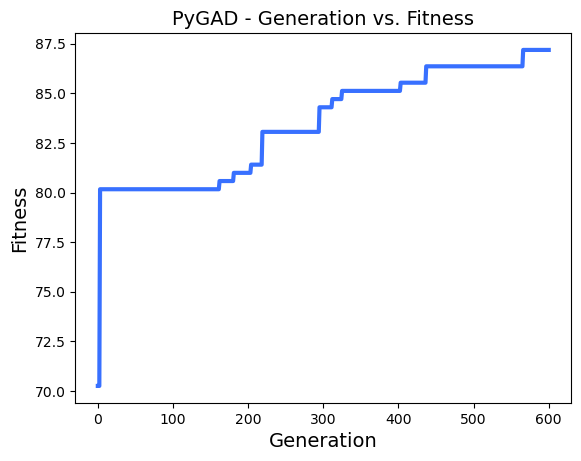

Fitness value of the best solution = 87.19008264462809
Best fitness value reached after 566 generations.
Generation = 100
Fitness    = 85.53719008264463
Change     = 0.0
Generation = 200
Fitness    = 87.60330578512396
Change     = 0.0
Generation = 300
Fitness    = 87.60330578512396
Change     = 0.0
Generation = 400
Fitness    = 87.60330578512396
Change     = 0.0
Generation = 500
Fitness    = 87.60330578512396
Change     = 0.0
Generation = 600
Fitness    = 87.60330578512396
Change     = 0.0


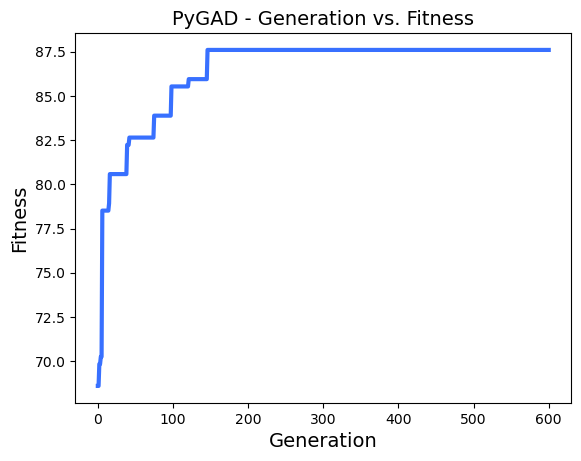

Fitness value of the best solution = 87.60330578512396
Best fitness value reached after 146 generations.
Generation = 100
Fitness    = 82.64462809917356
Change     = 0.0
Generation = 200
Fitness    = 82.64462809917356
Change     = 0.0
Generation = 300
Fitness    = 83.47107438016529
Change     = 0.0
Generation = 400
Fitness    = 83.47107438016529
Change     = 0.0
Generation = 500
Fitness    = 83.88429752066115
Change     = 0.0
Generation = 600
Fitness    = 86.36363636363636
Change     = 0.0


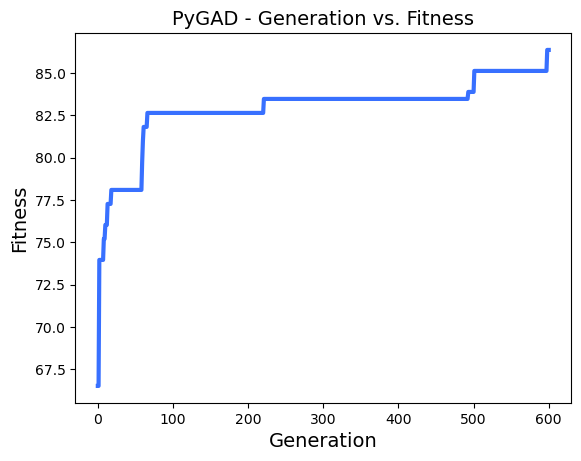

Fitness value of the best solution = 86.36363636363636
Best fitness value reached after 598 generations.
Generation = 100
Fitness    = 79.75206611570248
Change     = 0.0
Generation = 200
Fitness    = 85.12396694214877
Change     = 0.0
Generation = 300
Fitness    = 85.12396694214877
Change     = 0.0
Generation = 400
Fitness    = 86.36363636363636
Change     = 0.0
Generation = 500
Fitness    = 87.19008264462809
Change     = 0.0
Generation = 600
Fitness    = 87.19008264462809
Change     = 0.0


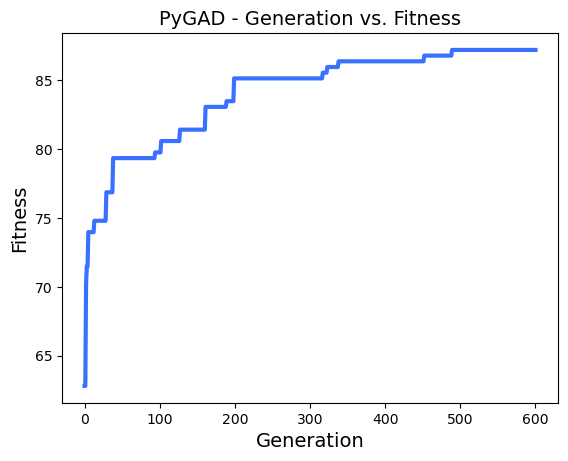

Fitness value of the best solution = 87.19008264462809
Best fitness value reached after 489 generations.
Generation = 100
Fitness    = 82.23140495867769
Change     = 0.0
Generation = 200
Fitness    = 83.05785123966942
Change     = 0.0
Generation = 300
Fitness    = 85.12396694214877
Change     = 0.0
Generation = 400
Fitness    = 85.53719008264463
Change     = 0.0
Generation = 500
Fitness    = 85.53719008264463
Change     = 0.0
Generation = 600
Fitness    = 85.9504132231405
Change     = 0.0


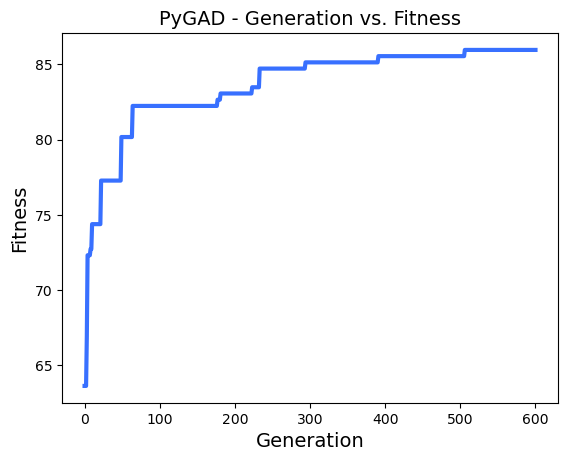

Fitness value of the best solution = 85.9504132231405
Best fitness value reached after 506 generations.
Generation = 100
Fitness    = 81.81818181818183
Change     = 0.8264462809917461
Generation = 200
Fitness    = 85.53719008264463
Change     = 0.0
Generation = 300
Fitness    = 85.53719008264463
Change     = 0.0
Generation = 400
Fitness    = 85.9504132231405
Change     = 0.0
Generation = 500
Fitness    = 88.42975206611571
Change     = 0.0
Generation = 600
Fitness    = 88.42975206611571
Change     = 0.0


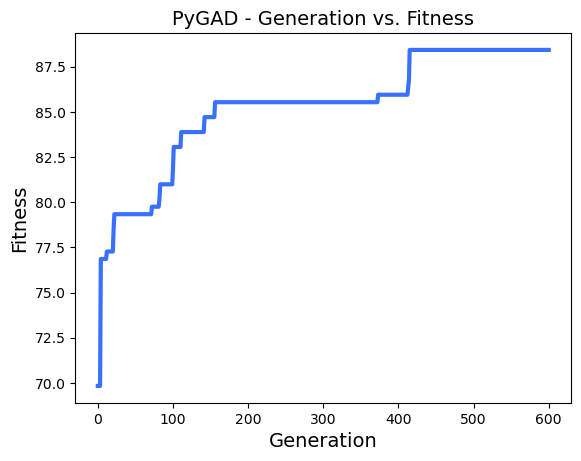

Fitness value of the best solution = 88.42975206611571
Best fitness value reached after 415 generations.
Generation = 100
Fitness    = 79.33884297520662
Change     = 0.0
Generation = 200
Fitness    = 84.71074380165288
Change     = 0.0
Generation = 300
Fitness    = 85.9504132231405
Change     = 0.8264462809917319
Generation = 400
Fitness    = 86.36363636363636
Change     = 0.0
Generation = 500
Fitness    = 86.77685950413223
Change     = 0.0
Generation = 600
Fitness    = 86.77685950413223
Change     = 0.0


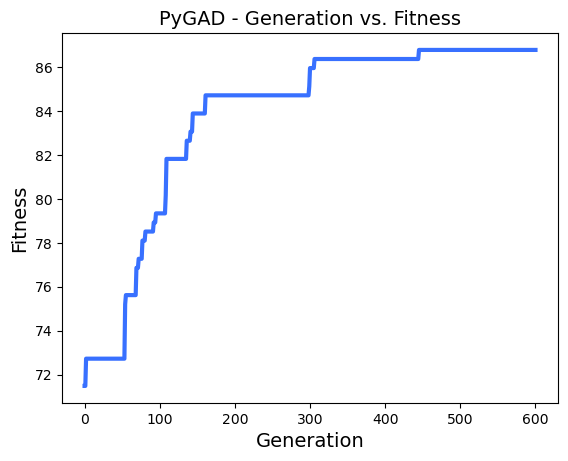

Fitness value of the best solution = 86.77685950413223
Best fitness value reached after 445 generations.
Generation = 100
Fitness    = 78.51239669421489
Change     = 0.0
Generation = 200
Fitness    = 82.23140495867769
Change     = 0.0
Generation = 300
Fitness    = 82.64462809917356
Change     = 0.0
Generation = 400
Fitness    = 83.47107438016529
Change     = 0.0
Generation = 500
Fitness    = 84.29752066115702
Change     = 0.8264462809917319
Generation = 600
Fitness    = 84.29752066115702
Change     = 0.0


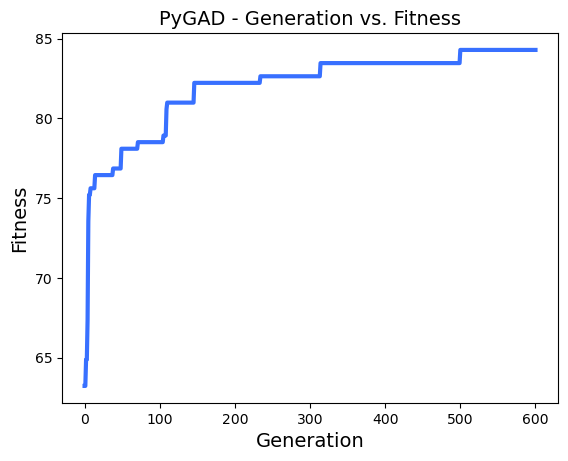

Fitness value of the best solution = 84.29752066115702
Best fitness value reached after 500 generations.
Generation = 100
Fitness    = 79.75206611570248
Change     = 0.0
Generation = 200
Fitness    = 83.05785123966942
Change     = 0.0
Generation = 300
Fitness    = 84.29752066115702
Change     = 0.0
Generation = 400
Fitness    = 84.29752066115702
Change     = 0.0
Generation = 500
Fitness    = 85.53719008264463
Change     = 0.0
Generation = 600
Fitness    = 85.53719008264463
Change     = 0.0


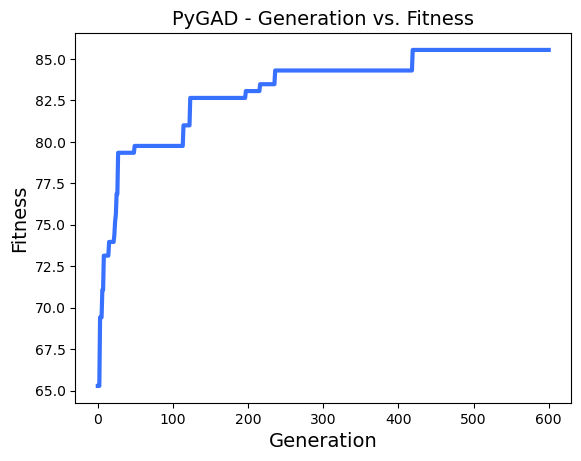

Fitness value of the best solution = 85.53719008264463
Best fitness value reached after 419 generations.
Generation = 100
Fitness    = 83.47107438016529
Change     = 1.239669421487605
Generation = 200
Fitness    = 83.47107438016529
Change     = 0.0
Generation = 300
Fitness    = 83.47107438016529
Change     = 0.0
Generation = 400
Fitness    = 83.47107438016529
Change     = 0.0
Generation = 500
Fitness    = 83.47107438016529
Change     = 0.0
Generation = 600
Fitness    = 84.29752066115702
Change     = 0.0


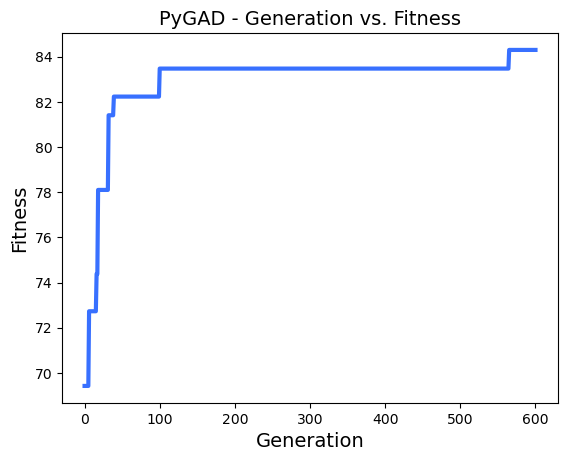

Fitness value of the best solution = 84.29752066115702
Best fitness value reached after 565 generations.


In [48]:
best_of_the_best = 0
array_of_fitnesses = []
verbose = 100
for x in range(10):
    GANN_instance = pygad.gann.GANN(num_solutions=num_solutions,
                                num_neurons_input=num_inputs,
                                num_neurons_hidden_layers=[8,16,32],
                                num_neurons_output=num_classes,
                                hidden_activations=["relu", "relu","relu"],
                                output_activation="sigmoid"
                               )
    GANN_instance_copy = GANN_instance
    population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)
    initial_population = population_vectors.copy()
    
    ga_instance = pygad.GA(num_generations=num_generations,
                           num_parents_mating=num_parents_mating,
                           initial_population=initial_population,
                           fitness_func=fitness_func,
                           mutation_percent_genes=(25,10),
                           mutation_probability=(0.15, 0.05),
                           mutation_num_genes=(4,2),
                           num_genes=len(array_X),
                           parent_selection_type=parent_selection_type,
                           crossover_probability=crossover_probability,
                           crossover_type=crossover_type,
                           mutation_type=mutation_type,
                           keep_parents=keep_parents,
                           on_generation=callback_generation)
    ga_instance.run()
    ga_instance.plot_fitness()

    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    array_of_fitnesses.append(solution_fitness)
    if(solution_fitness > best_of_the_best):
        best_of_the_best = solution_fitness
    print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

    if ga_instance.best_solution_generation != -1:
        print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

    predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[solution_idx],
                               data_inputs=data_inputs)

In [31]:
import statistics

num_wrong = numpy.where(predictions != data_outputs)[0]
num_correct = data_outputs.size - num_wrong.size
accuracy = 100 * (num_correct/data_outputs.size)
print("Number of correct classifications : {num_correct}.".format(num_correct=num_correct))
print("Number of wrong classifications : {num_wrong}.".format(num_wrong=num_wrong.size))
print("Classification accuracy : {accuracy}.".format(accuracy=accuracy))
print("Mean population fitness: {mean_fitness}".format(mean_fitness=statistics.mean(mean_population_fitness)))

Number of correct classifications : 223.
Number of wrong classifications : 19.
Classification accuracy : 92.14876033057851.
Mean population fitness: 83.75144772712218


In [27]:
print(array_of_fitnesses)

[90.08264462809917, 91.32231404958677, 91.32231404958677, 90.9090909090909, 92.97520661157024, 92.97520661157024, 89.6694214876033, 90.49586776859503, 91.73553719008265, 90.9090909090909]


In [49]:
array_of_arrays.append(array_of_fitnesses)
array_of_best_of_the_best.append(best_of_the_best)

In [50]:
print(array_of_arrays)
print(array_of_best_of_the_best)

[[90.08264462809917, 91.32231404958677, 91.32231404958677, 90.9090909090909, 92.97520661157024, 92.97520661157024, 89.6694214876033, 90.49586776859503, 91.73553719008265, 90.9090909090909], [91.73553719008265, 89.6694214876033, 92.56198347107438, 90.49586776859503, 90.9090909090909, 90.08264462809917, 90.49586776859503, 91.32231404958677, 91.32231404958677, 93.38842975206612], [92.56198347107438, 92.56198347107438, 92.97520661157024, 91.32231404958677, 91.73553719008265, 90.9090909090909, 90.49586776859503, 89.6694214876033, 92.97520661157024, 92.56198347107438], [91.32231404958677, 92.14876033057851, 90.9090909090909, 88.84297520661157, 89.25619834710744, 90.08264462809917, 91.73553719008265, 91.73553719008265, 89.6694214876033, 92.97520661157024], [87.19008264462809, 87.60330578512396, 86.36363636363636, 87.19008264462809, 85.9504132231405, 88.42975206611571, 86.77685950413223, 84.29752066115702, 85.53719008264463, 84.29752066115702]]
[92.97520661157024, 93.38842975206612, 92.9752066

In [45]:
y_pred_tr = pygad.nn.predict(last_layer=GANN_instance.population_networks[solution_idx],
                               data_inputs=X_train)
y_pred_ts = pygad.nn.predict(last_layer=GANN_instance.population_networks[solution_idx],
                               data_inputs=X_test)

print('Train Accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_tr)))
print('Test Accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_ts)))

Train Accuracy score: 0.9298
Test Accuracy score: 0.8033
